In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('airlines.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
# Converting date of journey to pandas datetime format as it will help generate more features such as month, weekday, etc and it will help us with analysis of the price variation depending on the time of the month.

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [6]:
df['weekday']=df['Date_of_Journey'].dt.dayofweek

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


In [8]:
df['month']=df['Date_of_Journey'].dt.month

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,4,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,3,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


# Converting departure and arrival time to datetime format

In [10]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [11]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [12]:
df['duration']=df['Arrival_Time']-df['Dep_Time']

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2019-12-12 22:20:00,2019-03-22 01:10:00,2h 50m,non-stop,No info,3897,6,3,-266 days +02:50:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2019-12-12 05:50:00,2019-12-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,0 days 07:25:00
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2019-12-12 09:25:00,2019-06-10 04:25:00,19h,2 stops,No info,13882,4,9,-186 days +19:00:00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2019-12-12 18:05:00,2019-12-12 23:30:00,5h 25m,1 stop,No info,6218,3,12,0 days 05:25:00
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2019-12-12 16:50:00,2019-12-12 21:35:00,4h 45m,1 stop,No info,13302,3,1,0 days 04:45:00


In [14]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
weekday                      int64
month                        int64
duration           timedelta64[ns]
dtype: object

In [15]:
df['duration']=pd.to_datetime(df['duration'])

In [16]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
weekday                     int64
month                       int64
duration           datetime64[ns]
dtype: object

In [17]:
df['duration_hr']=df['duration'].dt.hour

In [18]:
df['duration_min']=df['duration'].dt.minute

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2019-12-12 22:20:00,2019-03-22 01:10:00,2h 50m,non-stop,No info,3897,6,3,1969-04-10 02:50:00,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2019-12-12 05:50:00,2019-12-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,1970-01-01 07:25:00,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2019-12-12 09:25:00,2019-06-10 04:25:00,19h,2 stops,No info,13882,4,9,1969-06-29 19:00:00,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2019-12-12 18:05:00,2019-12-12 23:30:00,5h 25m,1 stop,No info,6218,3,12,1970-01-01 05:25:00,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2019-12-12 16:50:00,2019-12-12 21:35:00,4h 45m,1 stop,No info,13302,3,1,1970-01-01 04:45:00,4,45


In [20]:
drop=['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [21]:
df.drop(drop,inplace=True,axis=1)

In [22]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,6,3,1969-04-10 02:50:00,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,1970-01-01 07:25:00,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,4,9,1969-06-29 19:00:00,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,3,12,1970-01-01 05:25:00,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,1970-01-01 04:45:00,4,45


In [23]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Price                       int64
weekday                     int64
month                       int64
duration           datetime64[ns]
duration_hr                 int64
duration_min                int64
dtype: object

In [24]:
df.describe()

,Price,weekday,month,duration_hr,duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,2.892352,5.534775,7.734531,28.333333
std,4611.359167,1.836058,2.987489,6.423218,16.945953
min,1759.000000,0.000000,1.000000,0.000000,0.000000
25%,5277.000000,1.000000,3.000000,2.000000,15.000000
50%,8372.000000,3.000000,5.000000,6.000000,30.000000
75%,12373.000000,4.000000,6.000000,12.000000,45.000000
max,79512.000000,6.000000,12.000000,23.000000,55.000000


In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,6,3,1969-04-10 02:50:00,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,1970-01-01 07:25:00,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,4,9,1969-06-29 19:00:00,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,3,12,1970-01-01 05:25:00,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,1970-01-01 04:45:00,4,45


In [26]:
df['duration_hr']=df['duration_hr']*60

In [27]:
df['duration_min']=df['duration_min']+df['duration_hr']

In [28]:
df.drop('duration',inplace=True,axis=1)
df.drop('duration_hr',inplace=True,axis=1)

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,weekday,month,duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,6,3,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,4,9,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,3,12,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,285


In [30]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [32]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
df.drop('Route',inplace=True,axis=1)

In [34]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'weekday', 'month', 'duration_min'],
      dtype='object')

In [35]:
col=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'weekday', 'month', 'duration_min']

In [36]:
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()))

                                          Price
Airline                                        
Air Asia                            5590.260188
Air India                           9611.210616
GoAir                               5861.056701
IndiGo                              5673.682903
Jet Airways                        11643.923357
Jet Airways Business               58358.666667
Multiple carriers                  10902.678094
Multiple carriers Premium economy  11418.846154
SpiceJet                            4338.284841
Trujet                              4140.000000
Vistara                             7796.348643
Vistara Premium economy             8962.333333
                 Price
Source                
Banglore   8017.464269
Chennai    4789.892388
Delhi     10539.439057
Kolkata    9158.389411
Mumbai     5059.708752
                    Price
Destination              
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata    

# for easy understandability of the info above let us visualize it through graphs.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


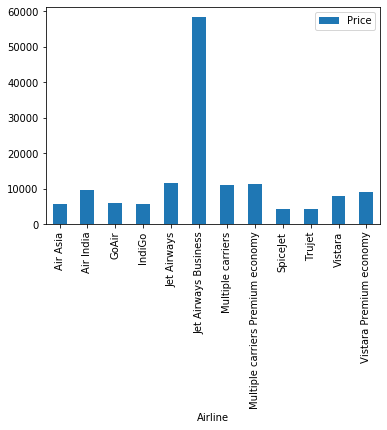

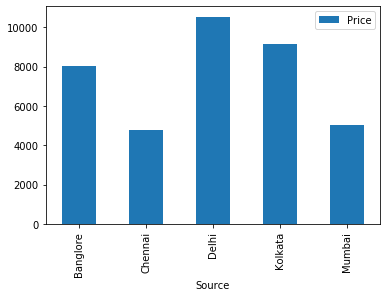

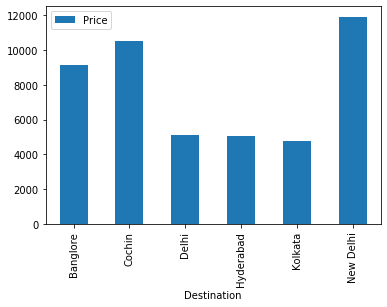

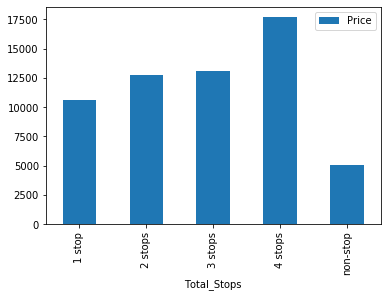

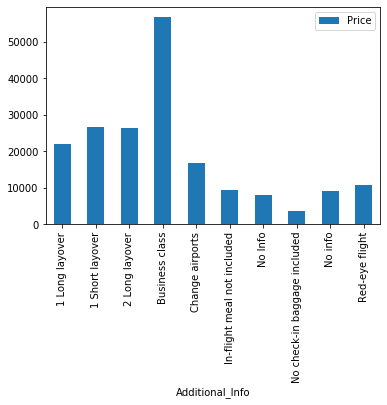

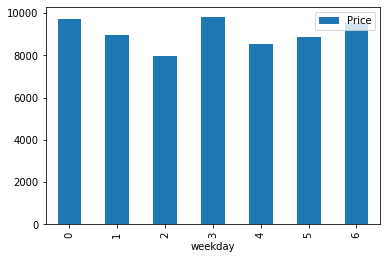

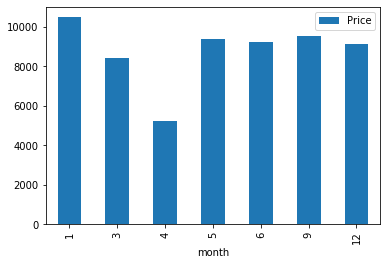

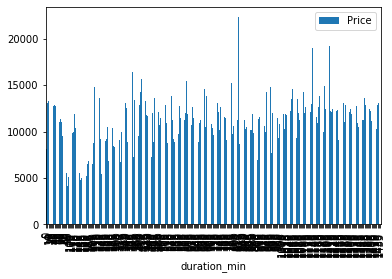

In [37]:
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()).plot.bar())

# from the graphs we can observe that.
1)Business class tickets are most expensive.
2)Flight with more stops is more expensive
3)day of the week does not seem to have any significant impact on the price paterns, whereas in the month graph it can be seen that entire year prices are lower in the first quarter as compare to the 3rd and 4th quarter of the year.
4)In the data some flights have 0 mins as there duration, which is definately a data collection error, so we will impute 0 mins with the mean.
5)New Delhi and Delhi are beingh shown as 2 different cities so we will combine them both.

In [38]:
df[df['duration_min']==0]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday,month,duration_min
103,Air India,Kolkata,Banglore,1 stop,No info,6528,3,12,0
498,Vistara,Kolkata,Banglore,1 stop,No info,8610,2,5,0
816,Air India,Kolkata,Banglore,1 stop,No info,6528,4,5,0
1141,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,5963,2,3,0
1938,Air India,Kolkata,Banglore,1 stop,No info,6528,4,12,0
2659,Air India,Kolkata,Banglore,1 stop,No info,6528,3,9,0
3350,Vistara,Kolkata,Banglore,1 stop,No info,9555,5,5,0
3456,Vistara,Kolkata,Banglore,1 stop,No info,8610,2,6,0
3659,Air India,Kolkata,Banglore,1 stop,No info,5006,2,9,0
4889,Vistara,Kolkata,Banglore,1 stop,No info,8610,3,12,0


In [39]:
df['duration_min']=df['duration_min'].replace(0,np.nan)

In [40]:
df.replace('New Delhi','Delhi',inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le=LabelEncoder()

In [43]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [44]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Additional_Info     object
Price                int64
weekday              int64
month                int64
duration_min       float64
dtype: object

In [45]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'weekday', 'month', 'duration_min'],
      dtype='object')

In [46]:
transform=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
si=SimpleImputer(strategy='most_frequent')
sim=SimpleImputer(strategy='mean')

In [49]:
df['duration_min']=sim.fit_transform(df['duration_min'].values.reshape(-1,1))

In [50]:
df['Total_Stops']=si.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [51]:
for m in transform:
    df[m]=le.fit_transform(df[m])

In [52]:
df['duration_min'].astype(int)

0         170
1         445
2        1140
3         325
4         285
5         145
6         930
7        1265
8          90
9         470
10        795
11        155
12        135
13        730
14        155
15        155
16        270
17       1355
18       1380
19       1235
20        310
21        920
22        170
23        175
24        800
25        910
26        345
27        355
28        170
29        135
         ... 
10653    1315
10654     160
10655      85
10656     160
10657     800
10658     175
10659     170
10660     175
10661     375
10662    1210
10663    1025
10664     175
10665     150
10666      45
10667    1285
10668     440
10669     675
10670    1045
10671      80
10672    1195
10673     900
10674      45
10675      80
10676     520
10677     160
10678     150
10679     155
10680     180
10681     160
10682     500
Name: duration_min, Length: 10683, dtype: int32

In [53]:
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday,month,duration_min
Airline,1.000000,-0.013401,0.070547,0.036064,-0.060802,-0.039520,-0.005488,-0.007918,-0.090359
Source,-0.013401,1.000000,-0.434227,-0.225601,-0.022107,0.015998,0.063759,0.063052,0.115103
Destination,0.070547,-0.434227,1.000000,0.510200,0.071300,-0.262157,-0.104772,-0.068903,-0.334164
Total_Stops,0.036064,-0.225601,0.510200,1.000000,0.164009,-0.571174,0.002112,-0.056524,-0.590464
Additional_Info,-0.060802,-0.022107,0.071300,0.164009,1.000000,-0.065478,-0.012681,-0.009098,-0.154269
Price,-0.039520,0.015998,-0.262157,-0.571174,-0.065478,1.000000,-0.007761,0.010700,0.450464
weekday,-0.005488,0.063759,-0.104772,0.002112,-0.012681,-0.007761,1.000000,-0.167990,0.002381
month,-0.007918,0.063052,-0.068903,-0.056524,-0.009098,0.010700,-0.167990,1.000000,0.062569
duration_min,-0.090359,0.115103,-0.334164,-0.590464,-0.154269,0.450464,0.002381,0.062569,1.000000


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
weekday            0
month              0
duration_min       0
dtype: int64

In [56]:
ss=StandardScaler()

In [57]:
col=df.columns
for m in df.columns:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [58]:
df.dtypes

Airline            float64
Source             float64
Destination        float64
Total_Stops        float64
Additional_Info    float64
Price              float64
weekday            float64
month              float64
duration_min       float64
dtype: object

In [59]:
plt.rcParams['figure.figsize']=(10,5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217255E9EB8>,
      dtype=object)

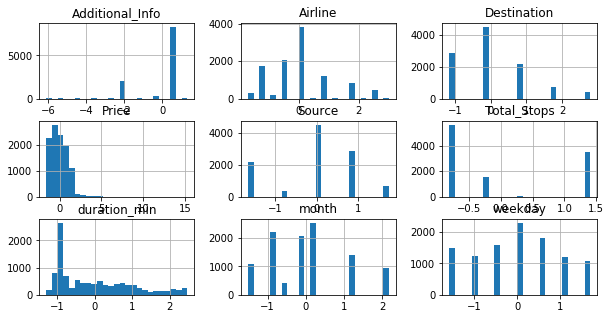

In [60]:
df.hist(bins=25)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [62]:
lr=LinearRegression()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,weekday,month,duration_min
0,-0.410675,-1.658441,0.815107,1.407309,0.499892,-1.125548,1.692644,-0.848503,-0.846335
1,-1.260999,0.890052,-1.159448,-0.253632,0.499892,-0.309048,1.147973,-1.517993,-0.127225
2,0.014486,0.040555,-0.172170,-0.253632,0.499892,1.039858,0.603303,1.159966,1.690163
3,-0.410675,0.890052,-1.159448,-0.807278,0.499892,-0.622202,0.058633,2.164201,-0.441018
4,-0.410675,-1.658441,0.815107,-0.807278,0.499892,0.914076,0.058633,-1.517993,-0.545616


In [65]:
x=df.drop('Price',axis=1)
y=df.iloc[:,-4].values.reshape(-1,1)

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
rd,ls=Ridge(),Lasso()

In [68]:
dtr=DecisionTreeRegressor(max_depth=9)

In [69]:
svm,knn,rfr=SVC(),KNeighborsRegressor(),RandomForestRegressor(n_estimators=23)

In [70]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
dtr.score(xtrain,ytrain)

0.8287614415774313

In [72]:
dtr.score(xtest,ytest)

0.7340953999460972

In [73]:
r2_score(dtr.predict(xtest),ytest)

0.7008173310192611

In [74]:
mean_squared_error(dtr.predict(xtest),ytest)

0.25011738752765733

In [75]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
lr.score(xtrain,ytrain)

0.353816741399819

In [77]:
lr.score(xtest,ytest)

0.3811278708633189

In [78]:
r2_score(lr.predict(xtest),ytest)

-0.6477604285686664

In [79]:
mean_squared_error(lr.predict(xtest),ytest)

0.5821286285456035

In [80]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=23,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
rfr.score(xtrain,ytrain)


0.9461606263315059

In [82]:
rfr.score(xtest,ytest)

0.7877843911380794

In [83]:
r2_score(rfr.predict(xtest),ytest)

0.7646469338747182

In [84]:
mean_squared_error(rfr.predict(xtest),ytest)

0.19961600389904827

In [85]:
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)

0.3538167350649817

In [86]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [87]:
knn.score(xtrain,ytrain)

0.8396596894513583

In [88]:
knn.score(xtest,ytest)

0.7547889546236459

In [89]:
r2_score(knn.predict(xtest),ytest)

0.6939844756369389

In [90]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(5,10):
    dt_model=DecisionTreeRegressor(max_depth=depth,random_state=10)
    dt_model.fit(xtrain,ytrain)
    train_accuracy.append(dt_model.score(xtrain,ytrain))
    validation_accuracy.append(dt_model.score(xtest,ytest))

In [91]:
frame=pd.DataFrame({'max_depth':range(5,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})

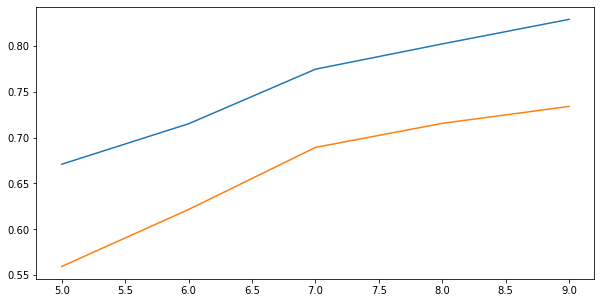

In [92]:
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['valid_acc'])

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cv=cross_val_score(rfr,x,y,cv=10)

In [95]:
cv.mean()

0.8054689132388038

In [96]:
cv.std()

0.026802084859563827

In [97]:
ada=AdaBoostRegressor(base_estimator=rfr)

In [98]:
ada.fit(xtrain,ytrain)
ada.score(xtrain,ytrain)


0.942696247069424

In [99]:
ada.score(xtest,ytest)

0.7806770335506903

In [100]:
r2_score(ada.predict(xtest),ytest)

0.7504358844556728

In [101]:
mean_squared_error(ada.predict(xtest),ytest)

0.20630138546680715

In [102]:
imp=rfr.feature_importances_
col=x.columns

In [103]:
imp_f=pd.DataFrame({'imp':imp,'col':col})

In [104]:
imp_f.sort_values('imp')

,imp,col
1,0.013059,Source
2,0.031453,Destination
5,0.066072,weekday
6,0.076169,month
4,0.091512,Additional_Info
7,0.113850,duration_min
0,0.178518,Airline
3,0.429366,Total_Stops


In [105]:
drop=['Source','Destination','Weekday']

In [106]:
x=df.drop('Price',axis=1)
y=df.iloc[:,-4].values.reshape(-1,1)

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [108]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lr.score(xtrain,ytrain)

0.3690606057237401

In [110]:
lr.score(xtest,ytest)

0.33540067840038745

In [111]:
train_accuracy=[]
validation_accuracy=[]
for estimate in range(10,25):
    rfr_model=RandomForestRegressor(n_estimators=estimate,random_state=10)
    rfr_model.fit(xtrain,ytrain)
    train_accuracy.append(rfr_model.score(xtrain,ytrain))
    validation_accuracy.append(rfr_model.score(xtest,ytest))

In [112]:
frame=pd.DataFrame({'estimators':range(10,25),'train_acc':train_accuracy,'valid_acc':validation_accuracy})

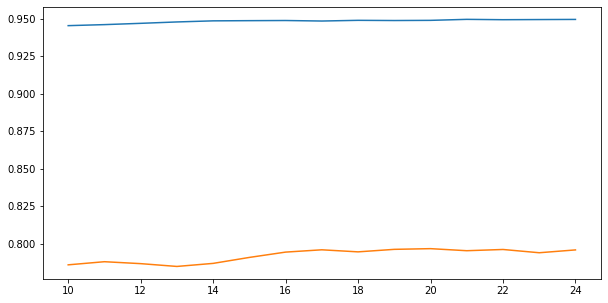

In [113]:
plt.plot(frame['estimators'],frame['train_acc'])
plt.plot(frame['estimators'],frame['valid_acc'])

In [114]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=23,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
rfr.score(xtrain,ytrain)

0.9504361403795005

In [116]:
rfr.score(xtest,ytest)

0.7913516156516828

In [117]:
r2_score(rfr.predict(xtest),ytest)

0.7564056516136229

In [118]:
np.sqrt(mean_squared_error(rfr.predict(xtest),ytest))

0.4574879094016192

In [119]:
cv=cross_val_score(rfr,x,y,cv=10)
cv.mean()

0.8088169600565894

In [120]:
cv.std()

0.02738675386608744

In [121]:
ada.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=23,
                                                       n_jobs=None,
                                                       oob_score=False,
                        

In [122]:
ada.score(xtrain,ytrain)

0.9440637622156625

In [123]:
ada.score(xtest,ytest)

0.7701194074917714

In [124]:
r2_score(ada.predict(xtest),ytest)

0.7095003063342179

In [125]:
import pickle


In [126]:
model_airlines=pickle.dumps(rfr)

In [ ]:
# RandomForest has given the best results.